# Referencias:

Fontes principais:
- <a id='dePrado'><span style='color:red'>dePrado</span></a>: *Advances in Financial Machine Learning*
- <a id='AFTS'><span style='color:red'>AFTS</span></a>: *Analysis of Financial Time Series*

Livros:
- <a id='intro_book'><span style='color:red'>intro_book</span></a>: An Introductory Study on Time-Series Modeling and Forecast
- <a id='forecasting'><span style='color:red'>forecasting<span></a>: Forecasting: Methods and Applications (HYNDMAN, Rob)

Artigos:
- <a id='hetero'><span style='color:red'>hetero</span></a>: Conditional heteroskedasticity in crypto-assets return
- <a id='ref_2'><span style='color:red'>ref_2</span></a>: Machine Learning Strategies for Time Series Forecasting
- <a id='ref_3'><span style='color:red'>ref_3</span></a>: Financial Series Prediction - Comparison Between Precision of Time Series Models and Machine Learning Methods
- <a id='ref_4'><span style='color:red'>ref_4</span></a>: The 10 reasons most machine learning funds fail
- <a id='ref_6'><span style='color:red'>ref_6</span></a>: Application of machine learning techniques for stock market prediction
- <a id='ref_7'><span style='color:red'>ref_7</span></a>: Time Series Data Prediction and Analysis
- <a id='ref_8'><span style='color:red'>ref_8</span></a>: Text Mining for Market Prediction - A Systematic Review

Links:
- <a id='xenon'><span style='color:red'>xenon</span></a>: https://www.xenonstack.com/blog/data-science/time-series-analysis-forecasting-using-machine-learning-deep-learning
- <a id='towards'><span style='color:red'>towards</span></a>: https://towardsdatascience.com/time-series-analysis-in-python-an-introduction-70d5a5b1d52a
- <a id='vidhya'><span style='color:red'>vidhya</span></a>: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
- <a id='vidhya2'><span style='color:red'>vidhya2</span></a>: https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/
- <a id='duke'><span style='color:red'>duke</span></a>: https://people.duke.edu/~rnau/411diff.htm
- <a id='auquan'><span style='color:red'>auquan</span></a>: https://medium.com/auquan/tagged/mathematics
- <a id='quantinsti'><span style='color:red'>quantinsti</span></a>: https://www.quantinsti.com/blog/forecasting-stock-returns-using-arima-model/
- <a id='ethz'><span style='color:red'>ethz</span></a>: http://stat.ethz.ch/~nicolai/timeseries/week2.pdf
- <a id='hyndman'><span style='color:red'>hyndman</span></a>: https://robjhyndman.com/talks/RevolutionR/8-Differencing.pdf - **bom resumo pra passar pro povo**
- <a id='statsmodel'><span style='color:red'>statsmodel</span></a>: https://www.statsmodels.org/stable/index.html
- <a id='stationarity'><span style='color:red'>stationarity</span></a>: https://stats.stackexchange.com/questions/19715/why-does-a-time-series-have-to-be-stationary & https://stats.stackexchange.com/questions/55477/stationarity-requirement-why
- <a id='arch'><span style='color:red'>arch</span></a>: http://arch.readthedocs.io/en/latest/unitroot/unitroot.html
- <a id='samir'><span style='color:red'>samir</span></a>: https://ufsj.edu.br/portal2-repositorio/File/martins/cap12_samir.pdf
- <a id='harvard'><span style='color:red'>harvard</span></a>: http://iacs-courses.seas.harvard.edu/courses/am207/blog/lecture-17.html - Harvard Lectures in Python
- <a id='quantstart'><span style='color:red'>quantstart</span></a>: https://www.quantstart.com/articles/Generalised-Autoregressive-Conditional-Heteroskedasticity-GARCH-p-q-Models-for-Time-Series-Analysis

# Teoria

## 0. Stationarity
- **Strictly stationary series**:
    - Joint distribution of $(r_{t1}, ..., r_{tk})$ is invariant under time shift.
- **Weakly stationary series**:
    - Constant mean, i.e., $E[r_t] = \mu$
    - Covariance between $r_t$ and $r_{t-l}$ are time-invariant, i.e., $cov(r_t, r_{t-l})=\gamma_l$, which only depends on $l$
- *In applications, weak stationarity enables one to make inferences concerning future observations (e.g., prediction).*

## 1. Covariance
- $ cov(X,Y) = E[(X - E(X))(Y - E(Y))] = E[XY] - E[X]E[Y] $
    
## 2. Correlation
- **Pearson correlation coefficient**
    - https://en.wikipedia.org/wiki/Pearson_correlation_coefficient
    - Formula:

        \begin{equation*}
            \rho_{X,Y} = \frac{cov(X,Y)}{\sigma_X \sigma_Y} \equiv \frac{cov(X,Y)}{\sqrt{var(X)var(Y)}}
        \end{equation*}
        <br>
        - For a sample: 

            \begin{equation} 
                \hat{\rho}_{X,Y} = \frac{\sum_{t=1}^{T} (x_t - \overline{x})(y_t - \overline{y})}
                    {\sqrt{\sum_{t=1}^{T}(x_t - \overline{x})^2\sum_{t=1}^{T}(y_t - \overline{y})^2}}
            \end{equation}
                
## 3. Lag-$l$ autocovariance of $r_t$

- Para lembrar: $\gamma$ tem um formato parecido com 'v', de autoco**v**ariancia.

\begin{equation}
    \gamma_l = cov(r_t, r_{t-l})
\end{equation}

- For a sample:
\begin{equation}
   \hat{\gamma_l} = \frac{1}{T-l-1} \sum_{t=l+1}^T (r_t - \overline{r})(r_{t-l} - \overline{r_l})
\end{equation}
    - under the stationarity assumption:
    \begin{equation}
       \hat{\gamma_l} = \frac{1}{T-l-1} \sum_{t=l+1}^T (r_t - \overline{r})(r_{t-l} - \overline{r})
    \end{equation}
- Properties: 
    1. $ \gamma_0 = Var(r_t) $  
    2. $\gamma_{-l}=\gamma_l $
        
## 4. Lag-$l$ autocorrelation of $r_t$

- Para lembrar: $\rho$ de autoco$\rho$elacao.

\begin{equation}
    \rho_l = \frac{cov(r_t,r_{t-l})}{\sqrt{var(r_t)var(r_{t-l})}}
\end{equation}
- which, under the stationary assumption, becomes
\begin{equation}
    \rho_l = \frac{cov(r_t,r_{t-l})}{var(r_t)} = \frac{\gamma_l}{\gamma_0}
\end{equation}

## 5. Lag-$l$ *sample* autocorrelation of $r_t$ $\equiv$ sample autocorrelation function (ACF)

\begin{equation}
    \hat{\rho_l} = \frac{\sum_{t=l+1}^T (r_t - \overline{r})(r_{t-l} - \overline{r})}{\sum_{t=1}^T (r_t - \overline{r})^2}, \quad 0 < l < T - 1
\end{equation}
<br>
-  a linear time series model can be characterized by its ACF, and linear time series modeling makes use of the sample ACF to capture the linear dynamic of the data.

## 7. Partial autocorrelation function (PACF)

- *Function of its ACF and is a useful tool for determining the order p of an AR model*.
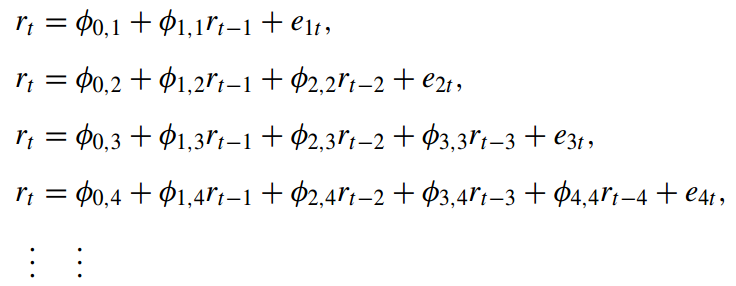
- The estimate $\hat{\phi}_{1,1}$ of the first equation is called the **lag-1 sample PACF** of rt. The estimate $\hat{\phi}_{2,2}$ of the second equation is the **lag-2 sample PACF** of rt. The estimate $\hat{\phi}_{3,3}$ of the third equation is the **lag-3 sample PACF** of $r_t$, and so on.
- The lag-2 PACF $\hat{\phi}_{2,2}$ shows the added contribution of $r_{t-2}$ to $r_t$ over the AR(1) model $r_t = \phi_0 + \phi_1 r_{t-1} + e_{1t}$. The lag-3 PACF shows the added contribution of $r_{t-3}$ to $r_t$ over an AR(2) model, and so on. Therefore, **for an AR(p) model, the lag-p sample PACF should not be zero, but $\hat{\phi}_{j,j}$ should be close to zero for all j > p**. We make use of this property to determine the order p.

## Predicao

1. Predicao ingenua: multistep - vai para a media
- **Simulacao atualizada um passo a frente**: Atualiza o modelo a cada iteracao e preve um passo a frente (overfitting(?) alto)
- **Simulacao um passo a frente**: Utiliza os parametros treinados ate $t$ para prever $t+1$, $t+2$, etc, iterativamente, utilizando os *valores reais* como entrada. (overfitting(?) medio)
- **Simulacao livre**: Utiliza os parametros treinados ate $t$ para prever $t+1$, $t+2$, etc, iterativamente, utilizando as *predicoes* como entrada (uma predicao em cima da outra). (overfitting(?) baixo)
- **Simulacao livre "purged"**: Utiliza os parametros treinados ate $t$ para prever dados em $t+h, t+h+1, t+h+2$, estilo **purged k-fold CV** (overfitting(?) baixo/nulo)

Fonte: [samir](#samir)

# PART I. Modelos lineares

## 1. AR(p) models

\begin{equation}
    r_t = \phi_0 + \phi_1 r_{t-1} + \phi_2 r_{t-2} + ... + + \phi_p r_{t-p} + a_t
\end{equation}

${a_t}$ is assumed to be white noise with mean 0 and variance $\sigma_a^2$

### Stationarity

- **Importante**: O fato de que $r_t$ dependa de $r_{t-1}$, $r_{t-2}$, etc, *nao* implica que a serie nao seja estacionaria. Inclusive, caso a hipotese de estacionariedade se confirme, a media, tanto para $r_t$ quanto para $r_{t-l}$ sera $\mu=\frac{\phi_0}{(1-\phi_1-\phi_2-...\phi_p)}$. Em outras palavras, **depender do passado nao e' equivalente a ser nao-estacionaria**.
<br><br>
- ACF of AR(1) model
    -  This result says that the ACF of a weakly stationary AR(1) series decays exponentially with rate $\phi_1$ and starting value $\rho_0$ = 1 (SEE [AFTS, pg. 34](#AFTS)).
<br><br>
- Stationarity condition for AR(p)
    - Remember that $E[r_t]= \mu =\frac{\phi_0}{(1-\phi_1-\phi_2-...\phi_p)}$
        -  The associated polynomial equation (**characteristic equation**) of the model is $1 - \phi_1x - \phi_2x^2 - ... - \phi_px^p=0$ (SEE [AFTS, pg. 39](#AFTS))
            - If all the solutions of this equation are greater than one in modulus, then the series $r_t$ is stationary.
            - Again, inverses of the solutions are the **characteristic roots** of the model. Thus, stationarity requires that **all characteristic roots are less than 1 in modulus**. 
            - For a stationary AR(p) series, the ACF satisfies the difference equation $(1-\phi_1B - ... - \phi_pB^p) \rho_p = 0$, for $l>0$.
                - **A plot of the ACF of a stationary AR(p) model would then show a mixture of damping sine and cosine patterns and exponential decays depending on the nature of its characteristic roots.**
<br><br>           

### Model selection
- **PACF cuts off at order p.**
    - Na pratica, e' muito mais ruidoso; logo, identificar por inspecao e' dificil. Dessa forma, e' utilizado um **criterio de informacao** para tomar esta decisao - AIC/BIC. (detalhes podem ser vistos em [AFTS](#AFTS)).
        - To use AIC to select an AR model in practice, one computes AIC($l$) for $l$ = 0, . . . , P, where P is a prespecified positive integer, and selects the order k that has the minimum AIC value.
            
### Parameter estimation
- For a specified AR(p) model, the conditional least squares method, which starts with the (p + 1)th observation, is often used to estimate the parameters.
- Os erros padroes dos coeficientes indicam quao estatisticamente significantes eles sao.
    
### Model checking
- **If the model is adequate, then the residual series should behave as a white noise. The ACF and the Ljung–Box statistics in Eq. (2.3) of the residuals can be used to check the closeness of ${\hat{a}_t}$ to a white noise.**
- If a fitted model is found to be inadequate, it must be refined. 

### Goodness of fit
- **Adjusted-R^2**

### Forecasting
- **1-step/multistep ahead**

-----

## 2. MA(q) models

\begin{equation}
    r_t = c_0 + a_t - \theta_1 a_{t-1} - \theta_2 a_{t-2} - ... - \theta_q a_{t-q} \equiv r_t = c_0 + (1 - \theta_1 B - ... - \theta_q B^q)a_t, \quad q > 0.
\end{equation}

- $r_t$ e' a soma ponderadas dos shocks $a_t, a_{t-1}, a_{t-2},...$.

- **Importante**: o fato de depender dos shocks *nao* implica que o modelo e' "randomico". Ainda que $a_t$ seja uma variavel aleatoria, em um instante $t$, $a_t, a_{t-1}, ...$ sao valores deterministicos (ja sabidos).

### Stationarity
MA models are always weakly stationary because they are finite linear combinations of a white noise sequence for which the first two moments are time-invariant.

### Model selection - Identifying MA order
- **ACF cuts off at order q.** (SEE [AFTS, pg. 52](#AFTS))

### Parameter estimation
- Maximum likelihood

### Forecasting
- In summary, for an MA(1) model, the 1-step ahead point forecast at the forecast origin $h$ is $c0 − \theta_1 a_h$ and the multistep ahead forecasts are $c_0$, which is the unconditional mean of the model.

## 2,5 Observation
 For a stationary series, the multistep ahead forecasts converge to the mean of the series and the variances of forecast errors converge to the variance of the series.

-----
 
## 3. ARMA

$$ r_t = \phi_0 + \sum_{i=1}^{p} \phi_i r_{t-i} + a_t - \sum_{i=1}^{q} \theta_i a_{t-i} \equiv (1 - \phi_1 B - ... - \phi_p B^p)r_t = (1 - \theta_1 B - ... - \theta_q B^q)a_t $$

### ACF e PACF
- ACF do ARMA(1,1) se comporta como o do modelo AR(1) - nao corta em nenhum *lag* finito -, exceto que o caimento exponencial ocorre a partir do *lag* 2.
- PACF do ARMA(1,1) se comporta como o do modelo MA(1) - nao corta em nenhum *lag* finito -, exceto que o caimento exponencial ocorre a partir do *lag* 2.

### Identifying ARMA models

---

## 4. ARIMA
Inclui uma diferenciacao aos dados (pode ser feita manualmente).

---

# PART II. Conditional Heteroscedastic models 
(Fonte: [AFTS](#AFTS))

Consider the unconditional mean and variance of $r_t$ given $F_{t-1}$ (information set available at $t-1$)

$$ \mu_t = E[r_t|F_{t-1}] \qquad \sigma_t^2 = Var(r_t|F_{t-1}) = E[(r_t-\mu_t)^2|F_{t-1}] $$

The conditional heteroscedastic models of this chapter are concerned with the **evolution of $\sigma_t^2$**. The manner under which $\sigma_t^2$ evolves over time distinguishes one volatility model from another.

There are two general categories:
1. Models that use an *exact function* to govern the evolution of $\sigma_t^2$, e.g., **GARCH**.
- Models that use a *stochastic equation* to describe $\sigma_t^2$, e.g., **stochastic volatility model**.

Therefore, modeling conditional heteroscedasticity amounts to augmenting a dynamic equation, which governs the time evolution of the conditional variance of the asset return, to a time series model.

### Model Building
4 steps:

1. <span style='color:orangered'>Specify a mean equation by testing for serial dependence in the data and, if necessary, building an econometric model (e.g., an ARMA model) for the return series to remove any linear dependence.</span>
2. <span style='color:orangered'>Use the residuals of the mean equation to test for ARCH effects.</span>
3. <span style='color:orangered'>Specify a volatility model if ARCH effects are statistically significant and perform a joint estimation of the mean and volatility equations.</span>
4. <span style='color:orangered'>Check the fitted model carefully and refine it if necessary.</span>

#### Testing for ARCH effects
**<span style='color:slateblue'>Let $a_t = r_t - \mu_t$ be the residuals of the mean equation. The squared series $a_t^2$ is then used to check for conditional heteroscedasticity</span>**.

- **Ljung-Box**
- **Lagrange Multiplier test of Engle (similar to F-statistic)**

## 5. ARCH (m)
$$ a_t = \sigma_t\epsilon_t, \qquad \sigma_t^2 = \alpha_0 + \sum_{i=1}^{m} \alpha_i a_{t-i}^2,  \\ 
\text{such that } \quad \alpha_0>0, \quad \alpha_i \geq 0, \qquad {\epsilon_t}: \text{sequence of iid random variables with mean 0 and variance 1.} $$

$\alpha_i$ must satisfy some regularity conditions to ensure that the unconditional variance of at is finite. 

Large past squared shocks $\{ a_{t-i}^2 \}_{i=1}^{m}$ imply a large conditional variance $\sigma_t^2$ for the innovation $a_t$. Consequently, $a_t$ tends to assume a large value in modulus. This means that, under the ARCH framework, large shocks tend to be followed by another large shock (similar to volatility clusterings).

**ARCH should only ever be applied to series that do not have any trends or seasonal effects, i.e. that has no (evident) serially correlation.** [quantstart](#quantstart)

### Weaknesses of ARCH(m) models
SEE [AFTS - 3.4.2](#AFTS)

### Building an ARCH(m) model
**<span style='color:slateblue'>One can use the PACF of $a_t^2$ to determine the ARCH order.</span>**

### Model Checking
For a properly specified ARCH model, the **standardized residuals** $\tilde{a_t} = \frac{a_t}{\sigma_t}$ form a sequence of iid random variables.

- Ljung-Box statistics
- Skewness, kurtosis and QQ-plots

### Forecasting

## 6. GARCH (m, s)
Although the ARCH model is simple, it often requires many parameters to adequately describe the volatility process of an asset return.

Let $a_t = r_t - \mu_t$ be the innovation at time $t$. Then, $a_t$ follows a **GARCH(m,s)** model if

$$ a_t = \sigma_t\epsilon_t, \qquad \sigma_t^2 = \alpha_0 + \sum_{i=1}^{m} \alpha_i a_{t-i}^2 + \sum_{j=1}^{s} \beta_j \sigma_{t-j}^2 \\ 
\text{such that } \quad \alpha_0>0, \quad \alpha_i \geq 0, \quad \beta_j \geq 0, \quad \sum_{i}^{max(m,s)} (\alpha_i + \beta_i)<1, \qquad {\epsilon_t}: \text{iid random variable (mean 0 and var 1).} $$

A GARCH model can be regarded as an application of the ARMA idea to the squared series $a_t^2$.

- As with ARCH models, large shocks tend to be followed by another large shock (similar to volatility clusterings).
- As with ARCH models, the tail distribution is heavier than that of a normal distribution (excess kurtosis), i.e., GARCH models are more likely to produce outliers (which is in agreement with empirical findings that outliers appear more in asset returns than in an iid sequence of normal random variables.

### Forecasting and weaknesses
Similar to ARCH.

### Model building
**<span style='color:slateblue'>Specifying the order of a GARCH model is not easy.</span>** Only lower order GARCH models are used in most applications, say, GARCH(1,1), GARCH(2,1), and GARCH(1,2) models. 


In [2]:
import os
import sys

import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
import sklearn.preprocessing as skp

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
import statsmodels.stats as sms
import arch.unitroot as au

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
py.init_notebook_mode(connected=True)

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
# Adaptado de: Stock_Download-data.ipynb
def plotscatter(df, columns=None, name='Stock name', title='Stock price', yaxis='Preco'):
    if columns is None: columns=df.columns
        
    # 1) Traces
    df_data = list(go.Scatter(x=df.index, y=df[col], name=col) for col in columns)

    # 2) Layout
    df_layout = go.Layout(title=title, legend={'orientation':'h'}, yaxis={'title':yaxis})

    # 3) Figure
    df_fig = go.Figure(data=df_data, layout=df_layout)
    py.iplot(df_fig)

In [4]:
# Source: auquan
def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return 

In [5]:
def roll_stats(ts, col='Value', window=30):
    rolling_mean = ts.rolling(window=30, center=False).mean().rename(columns={'Value':'Rolling Mean'})
    rolling_var = ts.rolling(window=30, center=False).var().rename(columns={col:'Rolling Variance'})
    
    ts_roll = pd.concat([rolling_mean, rolling_var], axis=1)
    ts_roll = ts_roll.dropna(axis=0, how='any')
    return ts_roll

In [6]:
def unitroot_test(ts, column='Values', max_lags=90):
    print(au.ADF(ts[column], max_lags=max_lags, method='AIC'))
    print('\n')
    print(au.PhillipsPerron(ts))
    print('\n-----------------------------------------------------\n')

In [7]:
def stationarity_test(ts):
    print(au.KPSS(ts))
    print('\n-----------------------------------------------------\n')

In [8]:
# Adaptado de Data_Analysis.ipynb
# Outra vantagem frente o Durbin-Watson [Fonte: https://en.wikipedia.org/wiki/Breusch%E2%80%93Godfrey_test]:
#    "The test is more general than the Durbin–Watson statistic (or Durbin's h statistic), which is only valid for 
#     nonstochastic regressors and for testing the possibility of a first-order autoregressive model (e.g. AR(1)) for
#     the regression errors." 
def serialcorr_test(results):
    '''Testa serial correlation dos residuos. "results" deve ser o resultado do fit de um modelo.'''
    lm, lmpval, fval, fpval = sms.diagnostic.acorr_breusch_godfrey(results=results, nlags=None, store=False)
    print('\n---------------------  TESTE DE BREUSCH_GODFREY  ---------------------')
    print('HIPOTESE NULA: Nao ha correlacao serial.')
    print('----------------------------------------------------------------------')
    print('Lagrange multiplier test statistic:                 ' + str(lm))
    print('P-value for Lagrange multiplier test:               ' + str(lmpval))
    print('F test statistic (mesmo teste, versao alternativa): ' + str(fval))
    print('P-value for F test:                                 ' + str(fpval))
    print('----------------------------------------------------------------------\n')

In [9]:
def difference_ts(ts, n=1, columns=None):
    '''Apply differencing to the time series'''
    ts = ts.dropna(axis=0,how='any')
    
    if columns is None: columns = list(ts.columns)
    
    ts_diff_dict = dict()
    for col in columns:
        ts_diff_dict[col] = np.diff(ts[col])
        
    ts_diff = pd.DataFrame(data=ts_diff_dict, index=ts.index[-len(ts_diff_dict[col]):])
    return ts_diff

In [10]:
def integrate_ts(ts, init_val=dict(), n=1, columns=None):
    '''Integrate the time series (inverse of differencing)'''
    if columns is None: columns = list(ts.columns)
    
    for i in range(n):
        ts_int_dict = dict()
        for col in columns:
            t0 = 0
            if col in init_val and len(init_val[col])>=i:
                t0 = init_val[col][-i]
            ts_int_dict[col] = np.cumsum(ts[col].values.squeeze()) + t0
        ts_int = pd.DataFrame(data=ts_int_dict, index=ts.index)
        
    return ts_int

In [108]:
def subtract_mean(ts, columns=None):
    '''Integrate the time series (inverse of differencing)'''
    if columns is None: columns = list(ts.columns)
    
    for col in columns:
        mu = ts[col].mean()
        ts[col] = ts[col] - mu
        
    return ts, mu

In [201]:
def best_model_order(ts, p_rng, q_rng):
    ts = ts.dropna(axis=0,how='any')
    best_aic = np.inf 
    best_order = None
    
    # Some models raise an exception of dividing by NaN or 0
    np.seterr(divide='ignore', invalid='ignore')

    all_aic = np.full(shape=(max(p_rng)+1,max(q_rng)+1), fill_value=np.nan)
    for i in p_rng:
        for j in q_rng:
            print(i,j, end=' / ')
            if i is 0 and j is 0: continue
            try:
                tmp_mdl = sm.tsa.ARIMA(ts, order=(i,0,j)).fit(method='mle', trend='c', maxiter=300)
                tmp_aic = tmp_mdl.aic
                all_aic[i,j] = tmp_aic
                if tmp_aic < best_aic:
                    best_aic = tmp_aic
                    best_order = (i, 0, j)
            except: continue
    print('aic: {:6.2f} | order: {}'.format(best_aic, best_order))                    
    return best_order, best_aic, all_aic

In [11]:
def generate_arima_instance(n=1000, p=0, d=0, q=0, phi=None, theta=None, seed=None):
    # Define seed
    if seed is not None: np.random.seed(seed)
        
    # Coeficientes da parte AR
    if phi is None:
        char_roots = np.array([10])
        while any(char_roots > 1): # Condicao de estacionariedade (se nao for respeitada, diverge a serie)
            phi = np.random.rand(p+1)*2 - 1 # inclui phi_0 (constante)
            char_roots = np.abs(1 / np.roots(np.r_[np.flip(-phi[1:],axis=-1),[1]]))
    
    # Coeficientes da parte MA
    if theta is None:
        theta_roots = np.array([0])
        while any(theta_roots < 1):
            theta = np.r_[[1],(np.random.rand(q)*2 - 1)] # inclui theta_0 = 1
            tmp_theta = -np.flip(theta, axis=-1)
            tmp_theta[-1] = 1  # ajusta elemento 
            theta_roots = np.abs(np.roots(tmp_theta))
        
    # Shocks (ruido branco)
    a = np.random.randn(n)

    # Calcula partes referentes ao MA
    r_ma = np.convolve(a, theta, 'full') 
    if q>0: r_ma = r_ma[:-q]
    
    # Calcula parte referente ao AR e soma com a parte do MA
    r = np.ones(n)
    for i in np.arange(n):
        past_values = r[max(0,i-p):i+1]
        coeff = phi[0:min(i+1,p+1)]
        r[i] = np.convolve(past_values, coeff, 'valid') + r_ma[i] # adds shock
    
    # Realiza d integracoes ('I' do 'ARIMA')
    for i in range(d):
        r = r.cumsum()
    
    return r, phi, theta

## 0. Helper functions

#### 0.* Suprime warnings

In [259]:
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='default', category=FutureWarning)

#### 0.* Transforma array de retornos em DataFrame

In [13]:
r2df= lambda r: pd.DataFrame(data=r, index=pd.date_range(end=datetime.date.today(),periods=len(r)), columns=['Value'])

#### 0.* Testa modelo para estacionariedade e unit-root

In [14]:
def test_model(ts, window=30, lags=30):
    # Rolling statistics
    rolling_stats = roll_stats(ts=ts, window=window)
    plotscatter(rolling_stats, title='Rolling Statistics')

    # Stationarity test
    stationarity_test(ts)

    # Unit-root test
    unitroot_test(ts, column='Value')

    # Plot ACF, PACF & QQ
    tsplot(ts['Value'], lags=lags)

## 1. White noise

In [15]:
# Teste #1: White noise
r_t1, phi_t1, theta_t1 = generate_arima_instance(seed=1)
ts_t1 = r2df(r_t1)

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t1))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t1))

# test_model(ts_t1)

Coeficientes AR (inclui constante): phi = [-0.16595599]
Coeficientes MA (inclui coef[0]=1): theta = [1.]


## 2. AR models

### 2.1 AR(1)

#### 2.1.1 Gera dados

In [16]:
# Teste #2.1: AR(1)
r_t2_1, phi_t2_1, theta_t2_1 = generate_arima_instance(p=1, phi=[0, 0.8], seed=21)
df_t2_1 = r2df(r_t2_1)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t2_1)))
n_test = len(r_t2_1) - n_train
r_t2_1_train, r_t2_1_test = r_t2_1[:n_train], r_t2_1[n_train:] # 80% treinamento
df_t2_1_train, df_t2_1_test = df_t2_1.iloc[:n_train], df_t2_1.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t2_1))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t2_1))

# test_model(df_t2_1)

Coeficientes AR (inclui constante): phi = [0, 0.8]
Coeficientes MA (inclui coef[0]=1): theta = [1.]


#### 2.1.2 Ajusta modelo

In [187]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t2_1_train, p_rng=range(4), q_rng=range(4))

0 0 / 0 1 / 0 2 / 0 3 / 1 0 / 1 1 / 1 2 / 1 3 / 2 0 / 2 1 / 2 2 / 2 3 / 3 0 / 3 1 / 3 2 / 3 3 / aic: 2276.99 | order: (1, 0, 0)


In [17]:
# Modelo ARIMA (statsmodels.api)
mdl_t2_1 = sm.tsa.SARIMAX(endog=df_t2_1_train, order=(1,0,0), trend='c') # ordem pode ser estimada pelo PACF
fitted_mdl_t2_1 = mdl_t2_1.fit(solver='lbfgs')                           # ajusta modelo aos dados de treinamento

print(fitted_mdl_t2_1.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1135.496
Date:                Thu, 17 May 2018   AIC                           2276.992
Time:                        09:24:47   BIC                           2291.046
Sample:                    08-22-2015   HQIC                          2282.391
                         - 10-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0212      0.035     -0.599      0.549      -0.091       0.048
ar.L1          0.8391      0.020     42.753      0.000       0.801       0.878
sigma2         0.9993      0.050     19.914      0.0

#### 2.1.3 Analise de residuos

In [18]:
# Marretada: faz um treino utilizando a funcao ARIMA, que e' compativel com a funcao do teste de Breusch-Godfrey
tmp_mdl_t2_1 = sm.tsa.ARIMA(endog=df_t2_1_train, order=(1,0,0))   # define modelo - a ordem pode ser estimada pelo PACF
fitted_tmp_mdl_t2_1 = tmp_mdl_t2_1.fit(trend='c', solver='lbfgs') # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t2_1)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 17.959059755421425
P-value for Lagrange multiplier test:               0.5901052774431175
F test statistic (mesmo teste, versao alternativa): 0.8946383504179998
P-value for F test:                                 0.5943980934189476
----------------------------------------------------------------------



#### 2.1.4 Predicao

In [19]:
# Predicao in-sample
df_pred_t2_1_train = df_t2_1_train.copy()
df_pred_t2_1_train['Predicted'] = fitted_mdl_t2_1.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t2_1.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t2_1 = sm.tsa.SARIMAX(endog=df_t2_1_test[purge_size:], order=(1,0,0), trend='c')
pred_mdl_t2_1 = test_mdl_t2_1.filter(fitted_mdl_t2_1.params)

df_pred_t2_1_test = df_t2_1_test.iloc[purge_size:].copy()
df_pred_t2_1_test['One-step'] = pred_mdl_t2_1.predict()
df_pred_t2_1_test['Multistep'] = fitted_mdl_t2_1.forecast(steps=len(df_pred_t2_1_test.index))

# Plota
plotscatter(df=df_pred_t2_1_train, title='Teste 2.1: AR(1)')
plotscatter(df=df_pred_t2_1_test, title='Teste 2.1: AR(1)')


### 2.2 AR(5)

#### 2.2.1 Gera dados

In [135]:
# Teste #2.2: AR(5)
r_t2_2, phi_t2_2, theta_t2_2 = generate_arima_instance(p=5, seed=22)
df_t2_2 = r2df(r_t2_2)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t2_2)))
n_test = len(r_t2_2) - n_train
r_t2_2_train, r_t2_2_test = r_t2_2[:n_train], r_t2_2[n_train:] # 80% treinamento
df_t2_2_train, df_t2_2_test = df_t2_2.iloc[:n_train], df_t2_2.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t2_2))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t2_2))

# test_model(df_t2_2)

Coeficientes AR (inclui constante): phi = [ 0.40387577 -0.40484347  0.53598548  0.37643665 -0.22563304  0.23041165]
Coeficientes MA (inclui coef[0]=1): theta = [1.]


#### 2.2.2 Ajusta modelo

In [168]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t2_2_train['Value'], p_rng=range(7), q_rng=range(4))

0 0 / 0 1 / 0 2 / 0 3 / 1 0 / 1 1 / 1 2 / 1 3 / 2 0 / 2 1 / 2 2 / 2 3 / 3 0 / 3 1 / 3 2 / 3 3 / 4 0 / 4 1 / 4 2 / 4 3 / 5 0 / 5 1 / 5 2 / 5 3 / 6 0 / 6 1 / 6 2 / 6 3 / aic: 2337.61 | order: (5, 0, 0)


In [21]:
# Modelo ARIMA (statsmodels.api)
mdl_t2_2 = sm.tsa.SARIMAX(endog=df_t2_2_train, order=(5,0,0), trend='c') # a ordem pode ser estimada pelo PACF
fitted_mdl_t2_2 = mdl_t2_2.fit(solver='lbfgs', maxiter=200)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t2_2.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(5, 0, 0)   Log Likelihood               -1161.805
Date:                Thu, 17 May 2018   AIC                           2337.610
Time:                        09:24:48   BIC                           2370.402
Sample:                    08-22-2015   HQIC                          2350.207
                         - 10-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4700      0.070      6.750      0.000       0.334       0.606
ar.L1         -0.4214      0.035    -12.138      0.000      -0.489      -0.353
ar.L2          0.5429      0.038     14.405      0.0

#### 2.2.3 Analise de residuos

In [22]:
tmp_mdl_t2_2 = sm.tsa.ARIMA(endog=df_t2_2_train, order=(5,0,0)) # define modelo - a ordem pode ser estimada pelo PACF
fitted_tmp_mdl_t2_2 = tmp_mdl_t2_2.fit(trend='c', solver='lbfgs')   # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t2_2)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 14.559510309011614
P-value for Lagrange multiplier test:               0.8010335003617115
F test statistic (mesmo teste, versao alternativa): 0.7544381289057233
P-value for F test:                                 0.7697046712501017
----------------------------------------------------------------------



#### 2.2.4 Predicao

In [23]:
# Predicao in-sample
df_pred_t2_2_train = df_t2_2_train.copy()
df_pred_t2_2_train['Predicted'] = fitted_mdl_t2_2.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t2_2.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t2_2 = sm.tsa.SARIMAX(endog=df_t2_2_test[purge_size:], order=(5,0,0), trend='c')
pred_mdl_t2_2 = test_mdl_t2_2.filter(fitted_mdl_t2_2.params)

df_pred_t2_2_test = df_t2_2_test.iloc[purge_size:].copy()
df_pred_t2_2_test['One-step'] = pred_mdl_t2_2.predict()
df_pred_t2_2_test['Multistep'] = fitted_mdl_t2_2.forecast(steps=len(df_pred_t2_2_test.index))

# Plota
plotscatter(df=df_pred_t2_2_train, title='Teste 2.2: AR(5)')
plotscatter(df=df_pred_t2_2_test, title='Teste 2.2: AR(5)')


## 3. MA models

### 3.1 MA(1)

#### 3.1.1 Gera dados

In [24]:
# Teste #3.1: MA(1)
r_t3_1, phi_t3_1, theta_t3_1 = generate_arima_instance(q=1, theta=[1, 0.8], seed=31)
df_t3_1 = r2df(r_t3_1)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t3_1)))
n_test = len(r_t3_1) - n_train
r_t3_1_train, r_t3_1_test = r_t3_1[:n_train], r_t3_1[n_train:] # 80% treinamento
df_t3_1_train, df_t3_1_test = df_t3_1.iloc[:n_train], df_t3_1.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t3_1))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t3_1))

# test_model(df_t3_1)

Coeficientes AR (inclui constante): phi = [-0.42789236]
Coeficientes MA (inclui coef[0]=1): theta = [1, 0.8]


#### 3.1.2 Ajusta modelo

In [169]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t3_1_train['Value'], p_rng=range(4), q_rng=range(4))

0 0 / 0 1 / 0 2 / 0 3 / 1 0 / 1 1 / 1 2 / 1 3 / 2 0 / 2 1 / 2 2 / 2 3 / 3 0 / 3 1 / 3 2 / 3 3 / aic: 2286.01 | order: (0, 0, 1)


In [25]:
# Modelo ARIMA com p=0, d=0, q=1 (statsmodels.api)
mdl_t3_1 = sm.tsa.SARIMAX(endog=df_t3_1_train, order=(0,0,1), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t3_1 = mdl_t3_1.fit(solver='lbfgs')   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t3_1.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -1140.007
Date:                Thu, 17 May 2018   AIC                           2286.013
Time:                        09:24:49   BIC                           2300.067
Sample:                    08-22-2015   HQIC                          2291.412
                         - 10-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.5066      0.065     -7.807      0.000      -0.634      -0.379
ma.L1          0.8143      0.021     39.580      0.000       0.774       0.855
sigma2         1.0108      0.050     20.140      0.0

#### 3.1.3 Analise de residuos

In [26]:
tmp_mdl_t3_1 = sm.tsa.ARIMA(endog=df_t3_1_train, order=(0,0,1))   # a ordem pode ser estimada pelo ACF
fitted_tmp_mdl_t3_1 = tmp_mdl_t3_1.fit(trend='c', solver='lbfgs') # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t3_1)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 14.229198418624378
P-value for Lagrange multiplier test:               0.8186874470353799
F test statistic (mesmo teste, versao alternativa): 0.73504655371683
P-value for F test:                                 0.7915570343203047
----------------------------------------------------------------------



#### 3.1.4 Predicao

In [27]:
# Predicao in-sample
df_pred_t3_1_train = df_t3_1_train.copy()
df_pred_t3_1_train['Predicted'] = fitted_mdl_t3_1.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t3_1.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t3_1 = sm.tsa.SARIMAX(endog=df_t3_1_test[purge_size:], order=(0,0,1), trend='c')
pred_mdl_t3_1 = test_mdl_t3_1.filter(fitted_mdl_t3_1.params)

df_pred_t3_1_test = df_t3_1_test.iloc[purge_size:].copy()
df_pred_t3_1_test['One-step'] = pred_mdl_t3_1.predict()
df_pred_t3_1_test['Multistep'] = fitted_mdl_t3_1.forecast(steps=len(df_pred_t3_1_test.index))

# Plota
plotscatter(df=df_pred_t3_1_train, title='Teste 3.1: MA(1)')
plotscatter(df=df_pred_t3_1_test, title='Teste 3.1: MA(1)')


### 3.2 MA(4)

#### 3.2.1 Gera dados

In [28]:
# Teste #3.2: MA(4)
r_t3_2, phi_t3_2, theta_t3_2 = generate_arima_instance(q=4, seed=32)
df_t3_2 = r2df(r_t3_2)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t3_2)))
n_test = len(r_t3_2) - n_train
r_t3_2_train, r_t3_2_test = r_t3_2[:n_train], r_t3_2[n_train:] # 80% treinamento
df_t3_2_train, df_t3_2_test = df_t3_2.iloc[:n_train], df_t3_2.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t3_2))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t3_2))

# test_model(df_t3_2)

Coeficientes AR (inclui constante): phi = [0.71777853]
Coeficientes MA (inclui coef[0]=1): theta = [ 1.         -0.11657302  0.10297557  0.40742498  0.17880246]


#### 3.2.2 Ajusta modelo

In [170]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t3_2_train['Value'], p_rng=range(4), q_rng=range(7))

0 0 / 0 1 / 0 2 / 0 3 / 0 4 / 0 5 / 0 6 / 1 0 / 1 1 / 1 2 / 1 3 / 1 4 / 1 5 / 1 6 / 2 0 / 2 1 / 2 2 / 2 3 / 2 4 / 2 5 / 2 6 / 3 0 / 3 1 / 3 2 / 3 3 / 3 4 / 3 5 / 3 6 / aic: 2298.92 | order: (0, 0, 4)


In [29]:
# Modelo ARIMA com p=0, d=0, q=4 (statsmodels.api)
mdl_t3_2 = sm.tsa.SARIMAX(endog=df_t3_2_train, order=(0,0,4), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t3_2 = mdl_t3_2.fit(solver='lbfgs',maxiter=300)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t3_2.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(0, 0, 4)   Log Likelihood               -1143.458
Date:                Thu, 17 May 2018   AIC                           2298.916
Time:                        09:24:50   BIC                           2327.024
Sample:                    08-22-2015   HQIC                          2309.714
                         - 10-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7506      0.063     11.954      0.000       0.628       0.874
ma.L1         -0.0439      0.035     -1.242      0.214      -0.113       0.025
ma.L2          0.1209      0.032      3.778      0.0

#### 3.2.3 Analise de residuos

In [30]:
tmp_mdl_t3_2 = sm.tsa.ARIMA(endog=df_t3_2_train, order=(0,0,4)) # define modelo - a ordem pode ser estimada pelo ACF
fitted_tmp_mdl_t3_2 = tmp_mdl_t3_2.fit(trend='c', solver='lbfgs')   # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t3_2)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 13.301241988739054
P-value for Lagrange multiplier test:               0.8640881360128885
F test statistic (mesmo teste, versao alternativa): 0.6588223493175827
P-value for F test:                                 0.867896322744333
----------------------------------------------------------------------



#### 3.2.4 Predicao

In [31]:
# Predicao in-sample
df_pred_t3_2_train = df_t3_2_train.copy()
df_pred_t3_2_train['Predicted'] = fitted_mdl_t3_2.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t3_2.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t3_2 = sm.tsa.SARIMAX(endog=df_t3_2_test[purge_size:], order=(0,0,4), trend='c')
pred_mdl_t3_2 = test_mdl_t3_2.filter(fitted_mdl_t3_2.params)

df_pred_t3_2_test = df_t3_2_test.iloc[purge_size:].copy()
df_pred_t3_2_test['One-step'] = pred_mdl_t3_2.predict()
df_pred_t3_2_test['Multistep'] = fitted_mdl_t3_2.forecast(steps=len(df_pred_t3_2_test.index))

# Plota
plotscatter(df=df_pred_t3_2_train, title='Teste 3.2: MA(4)')
plotscatter(df=df_pred_t3_2_test, title='Teste 3.2: MA(4)')


## 4. ARMA models


### 4.1 ARMA(1,1)

In [81]:
# Parametros para teste
p_t4_1 = 1
d_t4_1 = 0
q_t4_1 = 1
phi_t4_1 = [0, 0.7]
theta_t4_1 = [1, -0.4]
seed_t4_1 = 41

#### 4.1.1 Gera dados

In [82]:
# Teste #4.1: ARMA(1,1)
r_t4_1, phi_t4_1, theta_t4_1 = generate_arima_instance(p=p_t4_1,q=q_t4_1,phi=phi_t4_1,theta=theta_t4_1,seed=seed_t4_1)
df_t4_1 = r2df(r_t4_1)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t4_1)))
n_test = len(r_t4_1) - n_train
r_t4_1_train, r_t4_1_test = r_t4_1[:n_train], r_t4_1[n_train:] # 80% treinamento
df_t4_1_train, df_t4_1_test = df_t4_1.iloc[:n_train], df_t4_1.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t4_1))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t4_1))

# test_model(df_t4_1)

Coeficientes AR (inclui constante): phi = [0, 0.7]
Coeficientes MA (inclui coef[0]=1): theta = [1, -0.4]


#### 4.1.2 Ajusta modelo

In [202]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t4_1_train['Value'], p_rng=range(6), q_rng=range(6))

0 0 / 0 1 / 0 2 / 0 3 / 0 4 / 0 5 / 1 0 / 1 1 / 1 2 / 1 3 / 1 4 / 1 5 / 2 0 / 2 1 / 2 2 / 2 3 / 2 4 / 2 5 / 3 0 / 3 1 / 3 2 / 3 3 / 3 4 / 3 5 / 4 0 / 4 1 / 4 2 / 4 3 / 4 4 / 

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/base/model.py:473: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



4 5 / 5 0 / 5 1 / 5 2 / 5 3 / 5 4 / 5 5 / aic: 2253.74 | order: (4, 0, 2)


/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [83]:
# Modelo ARIMA com p=1, d=0, q=1 (statsmodels.api)
mdl_t4_1 = sm.tsa.SARIMAX(endog=df_t4_1_train, order=(p_t4_1,0,q_t4_1), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t4_1 = mdl_t4_1.fit(solver='lbfgs', maxiter=300)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t4_1.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1126.743
Date:                Thu, 17 May 2018   AIC                           2261.487
Time:                        09:36:53   BIC                           2280.225
Sample:                    08-22-2015   HQIC                          2268.685
                         - 10-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0176      0.021     -0.836      0.403      -0.059       0.024
ar.L1          0.6919      0.062     11.205      0.000       0.571       0.813
ma.L1         -0.4143      0.079     -5.276      0.0

#### 4.1.3 Analise de residuos

In [84]:
tmp_mdl_t4_1 = sm.tsa.ARIMA(endog=df_t4_1_train, order=(p_t4_1,0,q_t4_1)) # especificar ordem
fitted_tmp_mdl_t4_1 = tmp_mdl_t4_1.fit(trend='c', solver='lbfgs', maxiter=300) # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t4_1)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 12.516612727341592
P-value for Lagrange multiplier test:               0.8971484248253678
F test statistic (mesmo teste, versao alternativa): 0.6207190339380599
P-value for F test:                                 0.8994001740371683
----------------------------------------------------------------------



#### 4.1.4 Predicao

In [85]:
# Predicao in-sample
df_pred_t4_1_train = df_t4_1_train.copy()
df_pred_t4_1_train['Predicted'] = fitted_mdl_t4_1.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t4_1.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t4_1 = sm.tsa.SARIMAX(endog=df_t4_1_test[purge_size:], order=(p_t4_1,0,q_t4_1), trend='c')
pred_mdl_t4_1 = test_mdl_t4_1.filter(fitted_mdl_t4_1.params)

df_pred_t4_1_test = df_t4_1_test.iloc[purge_size:].copy()
df_pred_t4_1_test['One-step'] = pred_mdl_t4_1.predict()
df_pred_t4_1_test['Multistep'] = fitted_mdl_t4_1.forecast(steps=len(df_pred_t4_1_test.index))

# Plota
plotscatter(df=df_pred_t4_1_train, title='Teste 4.1: ARMA(1,1)')
plotscatter(df=df_pred_t4_1_test, title='Teste 4.1: ARMA(1,1)')


### 4.2 ARMA(4,3)

##### Observacao: Problema da convergencia - aumentar maxiter costuma resolver
Ref: https://stats.stackexchange.com/questions/313426/mle-convergence-errors-with-statespace-sarimax

#### 4.2.1 Gera dados

In [37]:
# Teste #4.2: ARMA(4,3)
r_t4_2, phi_t4_2, theta_t4_2 = generate_arima_instance(p=4, q=3, seed=42)
df_t4_2 = r2df(r_t4_2)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t4_2)))
n_test = len(r_t4_2) - n_train
r_t4_2_train, r_t4_2_test = r_t4_2[:n_train], r_t4_2[n_train:] # 80% treinamento
df_t4_2_train, df_t4_2_test = df_t4_2.iloc[:n_train], df_t4_2.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t4_2))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t4_2))

# test_model(df_t4_2)

Coeficientes AR (inclui constante): phi = [-0.63319098 -0.39151551  0.04951286 -0.13610996 -0.41754172]
Coeficientes MA (inclui coef[0]=1): theta = [ 1.          0.22370579 -0.72101228 -0.4157107 ]


#### 4.2.2 Ajusta modelo

In [204]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t4_2_train['Value'], p_rng=range(6), q_rng=range(6))

0 0 / 0 1 / 0 2 / 0 3 / 0 4 / 0 5 / 1 0 / 1 1 / 1 2 / 1 3 / 1 4 / 1 5 / 2 0 / 2 1 / 2 2 / 2 3 / 2 4 / 2 5 / 3 0 / 3 1 / 3 2 / 3 3 / 3 4 / 3 5 / 4 0 / 4 1 / 4 2 / 4 3 / 4 4 / 4 5 / 5 0 / 5 1 / 5 2 / 5 3 / 5 4 / 5 5 / aic: 2311.02 | order: (4, 0, 3)


In [38]:
# Modelo ARIMA com p=4, d=0, q=3 (statsmodels.api)
mdl_t4_2 = sm.tsa.SARIMAX(endog=df_t4_2_train, order=(4,0,3), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t4_2 = mdl_t4_2.fit(solver='lbfgs', maxiter=200)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t4_2.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(4, 0, 3)   Log Likelihood               -1147.045
Date:                Thu, 17 May 2018   AIC                           2312.090
Time:                        09:24:56   BIC                           2354.251
Sample:                    08-22-2015   HQIC                          2328.286
                         - 10-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6601      0.039    -16.730      0.000      -0.737      -0.583
ar.L1         -0.3997      0.079     -5.058      0.000      -0.555      -0.245
ar.L2          0.0516      0.043      1.196      0.2

#### 4.2.3 Analise de residuos

In [39]:
tmp_mdl_t4_2 = sm.tsa.ARIMA(endog=df_t4_2_train, order=(4,0,3)) # especificar ordem
fitted_tmp_mdl_t4_2 = tmp_mdl_t4_2.fit(trend='c', solver='lbfgs', maxiter=200) # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t4_2)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 10.820906363915839
P-value for Lagrange multiplier test:               0.9507353176475504
F test statistic (mesmo teste, versao alternativa): 0.5382707178438209
P-value for F test:                                 0.9508845290215072
----------------------------------------------------------------------



#### 4.2.4 Predicao

In [40]:
# Predicao in-sample
df_pred_t4_2_train = df_t4_2_train.copy()
df_pred_t4_2_train['Predicted'] = fitted_mdl_t4_2.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t4_2.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t4_2 = sm.tsa.SARIMAX(endog=df_t4_2_test[purge_size:], order=(4,0,3), trend='c')
pred_mdl_t4_2 = test_mdl_t4_2.filter(fitted_mdl_t4_2.params)

df_pred_t4_2_test = df_t4_2_test.iloc[purge_size:].copy()
df_pred_t4_2_test['One-step'] = pred_mdl_t4_2.predict()
df_pred_t4_2_test['Multistep'] = fitted_mdl_t4_2.forecast(steps=len(df_pred_t4_2_test.index))

# Plota
plotscatter(df=df_pred_t4_2_train, title='Teste 4.2: ARMA(4,3)')
plotscatter(df=df_pred_t4_2_test, title='Teste 4.2: ARMA(4,3)')


## 5. ARIMA

### 5.1 ARIMA(1,1,1)

#### 5.1.1 Gera dados

Coeficientes AR (inclui constante): phi = [ 0.35146283 -0.91057564]
Coeficientes MA (inclui coef[0]=1): theta = [ 1.         -0.31339265]


    KPSS Stationarity Test Results   
Test Statistic                  4.438
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                 -0.108
P-value                         0.949
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                 -0.183
P-value                         0.941
Lags                               22
-------------------------------------

Trend: Constant


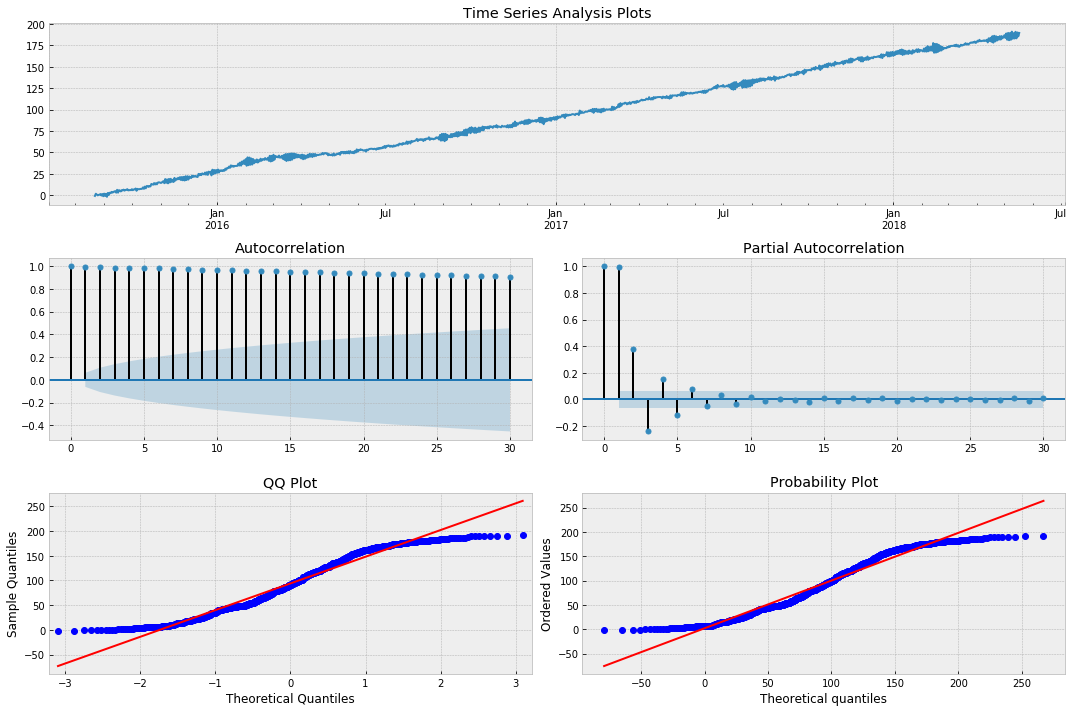

In [41]:
# Teste #5.1: ARIMA(1,1,1)
r_t5_1, phi_t5_1, theta_t5_1 = generate_arima_instance(p=1, d=1, q=1, seed=51)
df_t5_1 = r2df(r_t5_1)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t5_1)))
n_test = len(r_t5_1) - n_train
r_t5_1_train, r_t5_1_test = r_t5_1[:n_train], r_t5_1[n_train:] # 80% treinamento
df_t5_1_train, df_t5_1_test = df_t5_1.iloc[:n_train], df_t5_1.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t5_1))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t5_1))

test_model(df_t5_1)

#### 5.1.2 Ajusta modelo

##### 5.1.2.1 Abordagem: diferenciar manualmente e utilizar modelo ARMA

    KPSS Stationarity Test Results   
Test Statistic                  0.049
P-value                         0.883
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                -24.776
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic               -228.396
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant


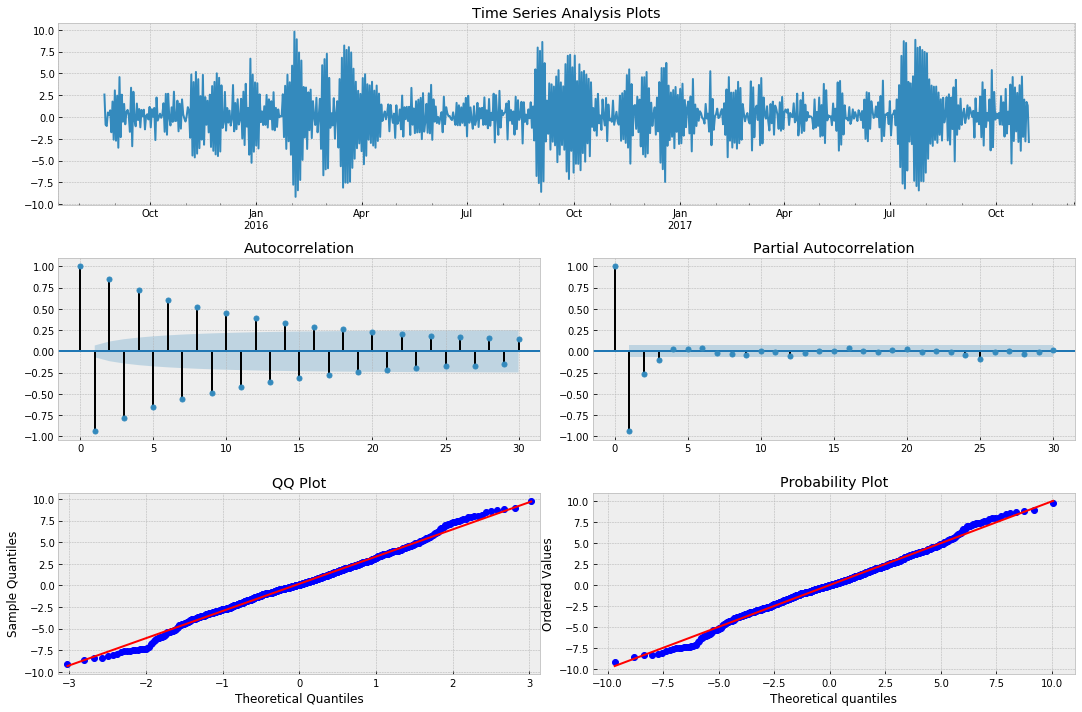

In [42]:
df_t5_1_train_diff = difference_ts(ts=df_t5_1_train)
df_t5_1_test_diff = difference_ts(ts=df_t5_1_test)
test_model(df_t5_1_train_diff)

In [43]:
# Modelo ARMA com p=1, d=0, q=1 (statsmodels.api)
mdl_t5_1 = sm.tsa.SARIMAX(endog=df_t5_1_train_diff, order=(1,0,1), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t5_1 = mdl_t5_1.fit(solver='lbfgs', maxiter=200)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t5_1.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  799
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -1142.035
Date:                Thu, 17 May 2018   AIC                           2292.071
Time:                        09:25:01   BIC                           2310.804
Sample:                    08-23-2015   HQIC                          2299.268
                         - 10-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.3651      0.025     14.408      0.000       0.315       0.415
ar.L1         -0.9101      0.016    -57.700      0.000      -0.941      -0.879
ma.L1         -0.3140      0.034     -9.103      0.0

##### 5.1.2.2 Validacao: utiliza modelo ARIMA com d=1

In [44]:
# Modelo ARIMA com p=1, d=1, q=1 (statsmodels.api)
mdl_t5_1_val = sm.tsa.ARIMA(endog=df_t5_1_train, order=(1,1,1)) # especificar ordem
fitted_mdl_t5_1_val = mdl_t5_1_val.fit(trend='c', solver='lbfgs')  # ajusta modelo aos dados de treinamento

print(fitted_mdl_t5_1_val.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Value   No. Observations:                  799
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1142.035
Method:                       css-mle   S.D. of innovations              1.009
Date:                Thu, 17 May 2018   AIC                           2292.071
Time:                        09:25:02   BIC                           2310.804
Sample:                    08-23-2015   HQIC                          2299.268
                         - 10-29-2017                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1912      0.013     14.894      0.000       0.166       0.216
ar.L1.D.Value    -0.9101      0.015    -59.742      0.000      -0.940      -0.880
ma.L1.D.Value    -0.3140      0.033     

#### 5.1.3 Analise de residuos

In [45]:
tmp_mdl_t5_1 = sm.tsa.ARIMA(endog=df_t5_1_train_diff, order=(1,0,1)) # especificar ordem
fitted_tmp_mdl_t5_1 = tmp_mdl_t5_1.fit(trend='c', solver='lbfgs')  # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t5_1)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 11.718486322645663
P-value for Lagrange multiplier test:               0.9254246932369614
F test statistic (mesmo teste, versao alternativa): 0.5790166668866283
P-value for F test:                                 0.9283008666387929
----------------------------------------------------------------------



#### 5.1.4 Predicao

In [46]:
# Predicao in-sample
df_pred_t5_1_train = df_t5_1_train_diff.copy()
df_pred_t5_1_train['Predicted'] = fitted_mdl_t5_1.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t5_1.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t5_1 = sm.tsa.SARIMAX(endog=df_t5_1_test_diff[purge_size:], order=(1,0,1), trend='c')
pred_mdl_t5_1 = test_mdl_t5_1.filter(fitted_mdl_t5_1.params)

df_pred_t5_1_test = df_t5_1_test_diff.iloc[purge_size:].copy()
df_pred_t5_1_test['One-step'] = pred_mdl_t5_1.predict()
df_pred_t5_1_test['Multistep'] = fitted_mdl_t5_1.forecast(steps=len(df_pred_t5_1_test.index))

# Plota
plotscatter(df=df_pred_t5_1_train, title='Teste 5.1: ARIMA(1,1,1)')
plotscatter(df=df_pred_t5_1_test, title='Teste 5.1: ARIMA(1,1,1)')


### 5.2 ARIMA(4,2,4)

#### 5.2.1 Gera dados

In [47]:
# Teste #5.2: ARIMA(1,1,1)
r_t5_2, phi_t5_2, theta_t5_2 = generate_arima_instance(p=4, d=2, q=4, seed=52)
df_t5_2 = r2df(r_t5_2)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t5_2)))
n_test = len(r_t5_2) - n_train
r_t5_2_train, r_t5_2_test = r_t5_2[:n_train], r_t5_2[n_train:] # 80% treinamento
df_t5_2_train, df_t5_2_test = df_t5_2.iloc[:n_train], df_t5_2.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante): phi = ' + str(phi_t5_2))
print('Coeficientes MA (inclui coef[0]=1): theta = ' + str(theta_t5_2))

# test_model(df_t5_2)

Coeficientes AR (inclui constante): phi = [ 0.31581774 -0.59736634  0.61697583  0.57280488 -0.21012072]
Coeficientes MA (inclui coef[0]=1): theta = [ 1.         -0.84250185 -0.02470948 -0.13122271 -0.50788411]


#### 5.2.2 Ajusta modelo

##### 5.2.2.1 Abordagem: diferenciar 2x manualmente e utilizar modelo ARMA

    KPSS Stationarity Test Results   
Test Statistic                  3.686
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                  1.511
P-value                         0.998
Lags                               10
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                  1.159
P-value                         0.996
Lags                               21
-------------------------------------

Trend: Constant


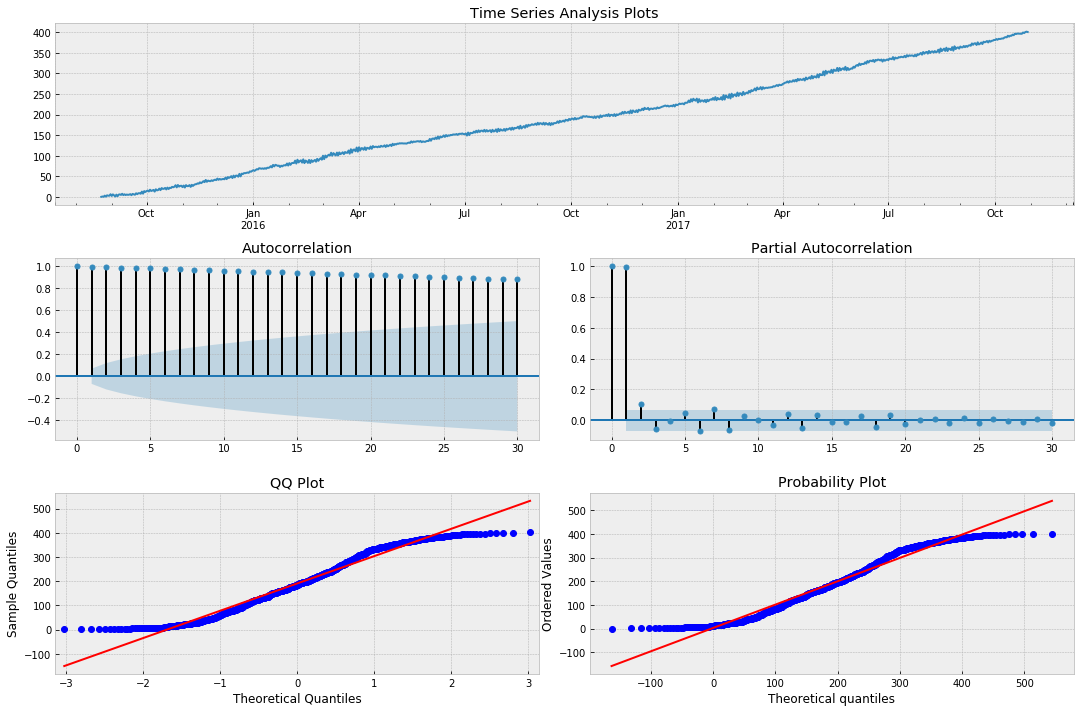

In [48]:
df_t5_2_train_diff = difference_ts(ts=df_t5_2_train)
df_t5_2_test_diff  = difference_ts(ts=df_t5_2_test)
test_model(df_t5_2_train_diff)

    KPSS Stationarity Test Results   
Test Statistic                  0.251
P-value                         0.188
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                 -9.509
P-value                         0.000
Lags                                9
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic               -132.021
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant


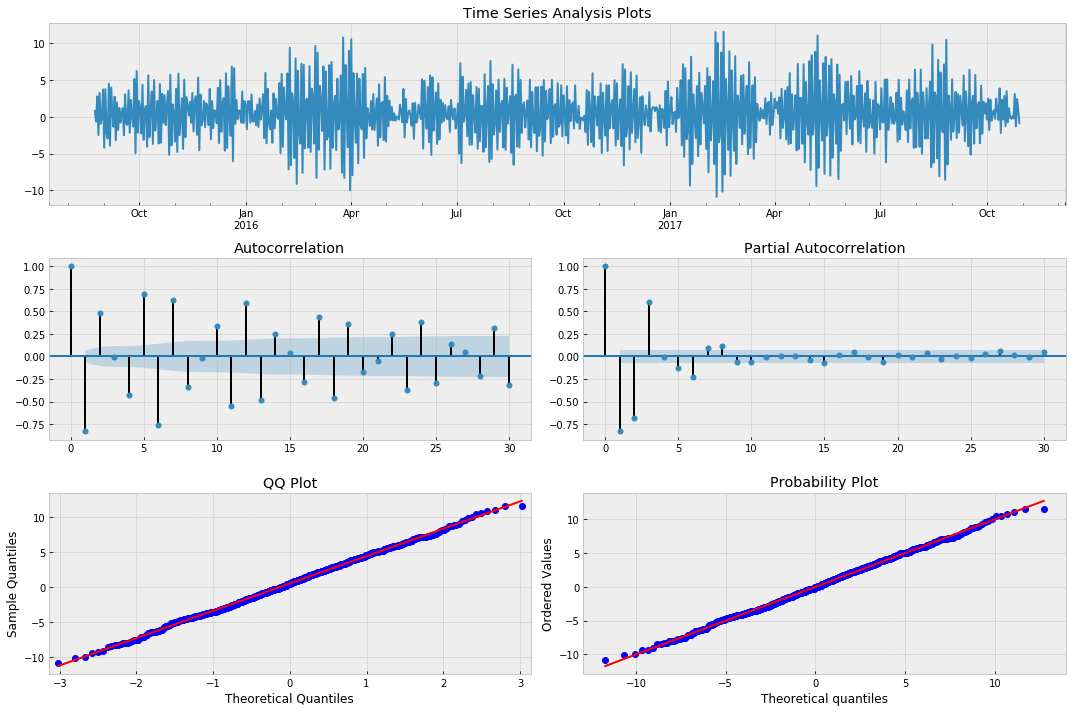

In [49]:
df_t5_2_train_diff2 = difference_ts(ts=df_t5_2_train_diff)
df_t5_2_test_diff2  = difference_ts(ts=df_t5_2_test_diff)
test_model(df_t5_2_train_diff2)

In [50]:
# Modelo ARMA com p=4, d=0, q=4 (statsmodels.api)
mdl_t5_2 = sm.tsa.SARIMAX(endog=df_t5_2_train_diff2, order=(4,0,4), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t5_2 = mdl_t5_2.fit(solver='lbfgs', maxiter=500)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t5_2.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  798
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -1280.843
Date:                Thu, 17 May 2018   AIC                           2581.686
Time:                        09:25:09   BIC                           2628.507
Sample:                    08-24-2015   HQIC                          2599.674
                         - 10-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3705      0.599      2.290      0.022       0.197       2.544
ar.L1         -1.1898      0.388     -3.066      0.002      -1.951      -0.429
ar.L2         -0.3829      0.579     -0.661      0.5

##### 5.2.2.2 Validacao: utiliza modelo ARIMA com d=2

In [51]:
# Modelo ARIMA com p=4, d=2, q=4 (statsmodels.api)
mdl_t5_2_val = sm.tsa.ARIMA(endog=df_t5_2_train, order=(4,2,4)) # especificar ordem
fitted_mdl_t5_2_val = mdl_t5_2_val.fit(trend='c', solver='lbfgs', maxiter=500) # ajusta modelo aos dados de treinamento

print(fitted_mdl_t5_2_val.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.Value   No. Observations:                  798
Model:                 ARIMA(4, 2, 4)   Log Likelihood               -1280.760
Method:                       css-mle   S.D. of innovations              1.201
Date:                Thu, 17 May 2018   AIC                           2581.519
Time:                        09:25:10   BIC                           2628.341
Sample:                    08-24-2015   HQIC                          2599.508
                         - 10-29-2017                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5025      0.033     15.341      0.000       0.438       0.567
ar.L1.D2.Value    -1.8167      0.714     -2.544      0.011      -3.216      -0.417
ar.L2.D2.Value    -1.2735      0.982

#### 5.2.3 Analise de residuos

In [52]:
tmp_mdl_t5_2 = sm.tsa.ARIMA(endog=df_t5_2_train_diff2, order=(4,0,4)) # especificar ordem
fitted_tmp_mdl_t5_2 = tmp_mdl_t5_2.fit(trend='c', solver='lbfgs')  # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t5_2)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 11.742331390570486
P-value for Lagrange multiplier test:               0.9246592234339148
F test statistic (mesmo teste, versao alternativa): 0.5802036568119838
P-value for F test:                                 0.9275579069328806
----------------------------------------------------------------------



#### 5.2.4 Predicao

In [53]:
# Predicao in-sample
df_pred_t5_2_train = df_t5_2_train_diff2.copy()
df_pred_t5_2_train['Predicted'] = fitted_mdl_t5_2.predict()

# Predicao out-of-sample (purged)
purge_size = max(list(fitted_mdl_t5_2.specification[it] for it in ['k_ar','k_ma']))
test_mdl_t5_2 = sm.tsa.SARIMAX(endog=df_t5_2_test_diff2[purge_size:], order=(4,0,4), trend='c')
pred_mdl_t5_2 = test_mdl_t5_2.filter(fitted_mdl_t5_2.params)

df_pred_t5_2_test = df_t5_2_test_diff2.iloc[purge_size:].copy()
df_pred_t5_2_test['One-step'] = pred_mdl_t5_2.predict()
df_pred_t5_2_test['Multistep'] = fitted_mdl_t5_2.forecast(steps=len(df_pred_t5_2_test.index))

# Plota
plotscatter(df=df_pred_t5_2_train, title='Teste 5.2: ARIMA(4,2,4)')
plotscatter(df=df_pred_t5_2_test, title='Teste 5.2: ARIMA(4,2,4)')


## 6. ARCH

## Conditional Heteroscedastic models 
(Fonte: [AFTS](#AFTS))

Consider the unconditional mean and variance of $r_t$ given $F_{t-1}$ (information set available at $t-1$)

$$ \mu_t = E[r_t|F_{t-1}] \qquad \sigma_t^2 = Var(r_t|F_{t-1}) = E[(r_t-\mu_t)^2|F_{t-1}] $$

The conditional heteroscedastic models of this chapter are concerned with the **evolution of $\sigma_t^2$**. The manner under which $\sigma_t^2$ evolves over time distinguishes one volatility model from another.

There are two general categories:
1. Models that use an *exact function* to govern the evolution of $\sigma_t^2$, e.g., **GARCH**.
- Models that use a *stochastic equation* to describe $\sigma_t^2$, e.g., **stochastic volatility model**.

Therefore, modeling conditional heteroscedasticity amounts to augmenting a dynamic equation, which governs the time evolution of the conditional variance of the asset return, to a time series model.

### Model Building
4 steps:

1. <span style='color:orangered'>Specify a mean equation by testing for serial dependence in the data and, if necessary, building an econometric model (e.g., an ARMA model) for the return series to remove any linear dependence.</span>
2. <span style='color:orangered'>Use the residuals of the mean equation to test for ARCH effects.</span>
3. <span style='color:orangered'>Specify a volatility model if ARCH effects are statistically significant and perform a joint estimation of the mean and volatility equations.</span>
4. <span style='color:orangered'>Check the fitted model carefully and refine it if necessary.</span>

#### Testing for ARCH effects
**<span style='color:slateblue'>Let $a_t = r_t - \mu_t$ be the residuals of the mean equation. The squared series $a_t^2$ is then used to check for conditional heteroscedasticity</span>**.

- **Ljung-Box**
- **Lagrange Multiplier test of Engle (similar to F-statistic)**

## 6. ARCH (m)
$$ a_t = \sigma_t\epsilon_t, \qquad \sigma_t^2 = \alpha_0 + \sum_{i=1}^{m} \alpha_i a_{t-i}^2,  \\ 
\text{such that } \quad \alpha_0>0, \quad \alpha_i \geq 0, \qquad {\epsilon_t}: \text{sequence of iid random variables with mean 0 and variance 1.} $$

$\alpha_i$ must satisfy some regularity conditions to ensure that the unconditional variance of at is finite. 

Large past squared shocks $\{ a_{t-i}^2 \}_{i=1}^{m}$ imply a large conditional variance $\sigma_t^2$ for the innovation $a_t$. Consequently, $a_t$ tends to assume a large value in modulus. This means that, under the ARCH framework, large shocks tend to be followed by another large shock (similar to volatility clusterings).

### Weaknesses of ARCH(m) models
SEE [AFTS - 3.4.2](#AFTS)

### Building an ARCH(m) model
**<span style='color:slateblue'>One can use the PACF of $a_t^2$ to determine the ARCH order.</span>**

### Model Checking
For a properly specified ARCH model, the **standardized residuals** $\tilde{a_t} = \frac{a_t}{\sigma_t}$ form a sequence of iid random variables.

- Ljung-Box statistics
- Skewness, kurtosis and QQ-plots

### Forecasting

## 7. GARCH (m, s)
Although the ARCH model is simple, it often requires many parameters to adequately describe the volatility process of an asset return.

Let $a_t = r_t - \mu_t$ be the innovation at time $t$. Then, $a_t$ follows a **GARCH(m,s)** model if

$$ a_t = \sigma_t\epsilon_t, \qquad \sigma_t^2 = \alpha_0 + \sum_{i=1}^{m} \alpha_i a_{t-i}^2 + \sum_{j=1}^{s} \beta_j \sigma_{t-j}^2 \\ 
\text{such that } \quad \alpha_0>0, \quad \alpha_i \geq 0, \quad \beta_j \geq 0, \quad \sum_{i}^{max(m,s)} (\alpha_i + \beta_i)<1, \qquad {\epsilon_t}: \text{iid random variable (mean 0 and var 1).} $$

A GARCH model can be regarded as an application of the ARMA idea to the squared series $a_t^2$.

- As with ARCH models, large shocks tend to be followed by another large shock (similar to volatility clusterings).
- As with ARCH models, the tail distribution is heavier than that of a normal distribution (excess kurtosis), i.e., GARCH models are more likely to produce outliers (which is in agreement with empirical findings that outliers appear more in asset returns than in an iid sequence of normal random variables.

### Forecasting and weaknesses
Similar to ARCH.

### Model building
**<span style='color:slateblue'>Specifying the order of a GARCH model is not easy.</span>** Only lower order GARCH models are used in most applications, say, GARCH(1,1), GARCH(2,1), and GARCH(1,2) models. 

In [54]:
np.random.seed(13)

a0 = 2
a1 = .5

y = w = np.random.normal(size=1000)
Y = np.empty_like(y)

for t in range(len(y)):
    y[t] = w[t] * np.sqrt((a0 + a1*y[t-1]**2))

In [245]:
def generate_garch_instance(n=1000, p=0, d=0, q=0, m=1, s=1, phi=None, theta=None, alpha=None, beta=None, seed=None):
    # Define seed
    if seed is not None: np.random.seed(seed)
        
    # Coeficientes da parte AR
    if phi is None:
        char_roots = np.array([10])
        while any(char_roots > 1): # Condicao de estacionariedade (se nao for respeitada, diverge a serie)
            phi = np.random.rand(p+1)*2 - 1 # inclui phi_0 (constante)
            char_roots = np.abs(1 / np.roots(np.r_[np.flip(-phi[1:],axis=-1),[1]]))
    
    # Coeficientes da parte MA
    if theta is None:
        theta_roots = np.array([0])
        while any(theta_roots < 1):
            theta = np.r_[[1],(np.random.rand(q)*2 - 1)] # inclui theta_0 = 1
            tmp_theta = -np.flip(theta, axis=-1)
            tmp_theta[-1] = 1  # ajusta elemento 
            theta_roots = np.abs(np.roots(tmp_theta))
        
    # Coeficientes da parte AR *do GARCH*
    if alpha is None:
        alpha = np.random.rand(m+1) # constante (alpha_0) + coeficientes alpha_i de a_{t-i}, i=1,...,m
        
    # Coeficientes da parte MA *do GARCH*
    if beta is None:
        beta = np.random.rand(s)    # coeficientes beta_j de sigma2_{t-j}, j=1,...,s
        
    # Condicao de validade:
    if alpha[0] > 1: alpha[0] = np.random.rand()
    for i in range(max(m,s)):
        c1 = c2 = 0
        if i<m: c1 = alpha[i+1] # se ainda houver coeficiente alpha
        if i<s: c2 = beta[i]    # se ainda houver coeficiente beta
        if c1+c2 >= 1:
            delta = np.random.rand()*0.2
            c1 = c1/(c1+c2) - delta
            c2 = c2/(c1+c2) - delta
        if i<m: alpha[i+1] = c1 # se ainda houver coeficiente alpha
        if i<s: beta[i] = c2    # se ainda houver coeficiente beta
        
    # Ruido branco
    eps = np.random.randn(n)
        
    # Shocks 
    a = np.ones(n) # importante ser inicializado como 1
    sigma2 = np.ones(n)
    for t in np.arange(n):
        coef_shocks = alpha[0:min(t+1,m+1)]                   # [alpha_0, alpha_1, alpha_2, ...]
        past_shocks = np.flip(a[max(0,t-m):t+1], axis=-1)     # flip([..., a_{t-2}, a_{t-1}, 1])
        coef_sigmas = beta[0:min(t,s)]                        # [beta_1, beta_2, ...]
        past_sigmas = np.flip(sigma2[max(0,t-s):t], axis=-1)  # flip([..., sigma_{t-2}, sigma_{t-1}])
        
        # Sigma^2_t
        sigma2[t] = np.sqrt(np.inner(coef_shocks,past_shocks**2) + np.inner(coef_sigmas,past_sigmas**2))
        
        # a_t
        a[t] = sigma2[t] * eps[t] # multiplica pelo ruido

    # Calcula partes referentes ao MA
    r_ma = np.convolve(a, theta, 'full') 
    if q>0: r_ma = r_ma[:-q]
    
    # Calcula parte referente ao AR e soma com a parte do MA
    r = np.ones(n)
    for i in np.arange(n):
        past_values = r[max(0,i-p):i+1]
        coeff = phi[0:min(i+1,p+1)]
        r[i] = np.convolve(past_values, coeff, 'valid') + r_ma[i] # adds shock
    
    # Realiza d integracoes ('I' do 'ARIMA')
    for i in range(d):
        r = r.cumsum()
    
    return_dict = {'r':r, 'phi':phi, 'theta':theta, 'a':a, 'alpha':alpha, 'beta':beta}
    
    return return_dict

### 6.1 ARMA(1,1) + GARCH(1,1)

#### 6.1.1 Gera dados

Coeficientes AR (inclui constante):           phi = [0, 0.7]
Coeficientes MA (inclui coef[0]=1):         theta = [1, -0.4]


    KPSS Stationarity Test Results   
Test Statistic                  0.063
P-value                         0.794
Lags                               22
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                -13.712
P-value                         0.000
Lags                                2
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.86 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                -23.994
P-value                         0.000
Lags                               22
-------------------------------------

Trend: Constant


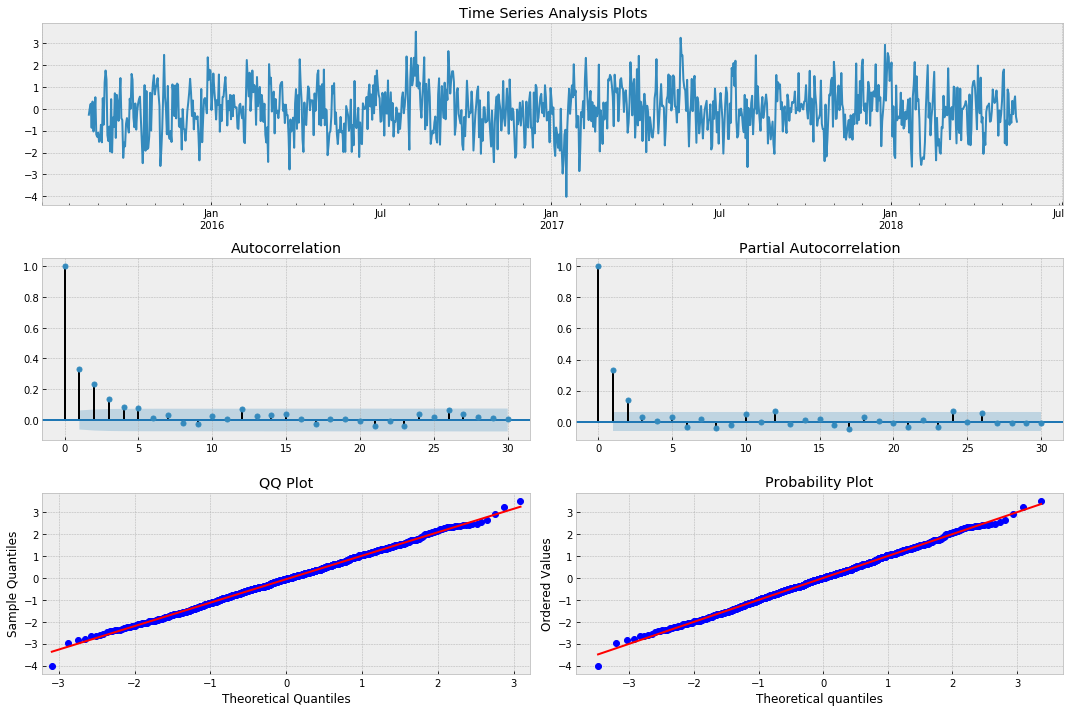

In [270]:
# Teste #6.1: ARMA(1,1) + GARCH(1,1)
# t6_1 = generate_garch_instance(p=1, q=1, m=1, s=1, phi=[0, 0.7], theta=[1, -0.4], alpha=[0.5,0.3], beta=[0.6], seed=61)
# r_t6_1, phi_t6_1, theta_t6_1  = t6_1['r'], t6_1['phi'], t6_1['theta']
# a_t6_1, alpha_t6_1, beta_t6_1 = t6_1['a'], t6_1['alpha'], t6_1['beta']
# df_t6_1 = r2df(r_t6_1)
# df_a_t6_1 = r2df(a_t6_1)

r_t6_1, phi_t6_1, theta_t6_1 = generate_arima_instance(p=1,q=1,phi=[0, 0.7],theta=[1, -0.4],seed=41)
df_t6_1 = r2df(r_t6_1)

# Split treinamento-teste
n_train = int(np.ceil(0.8*len(r_t6_1)))
n_test = len(r_t6_1) - n_train
r_t6_1_train, r_t6_1_test = r_t6_1[:n_train], r_t6_1[n_train:] # 80% treinamento
df_t6_1_train, df_t6_1_test = df_t6_1.iloc[:n_train], df_t6_1.iloc[n_train:]

# Imprime parametros
print('Coeficientes AR (inclui constante):           phi = ' + str(phi_t6_1))
print('Coeficientes MA (inclui coef[0]=1):         theta = ' + str(theta_t6_1))
# print('Coeficientes AR (GARCH) (inclui constante): alpha = ' + str(alpha_t6_1))
# print('Coeficientes MA (GARCH):                     beta = ' + str(beta_t6_1))

test_model(df_t6_1)
# test_model(df_a_t6_1)

#### 6.1.2 Ajusta modelo

In [248]:
# Validacao: funcao que itera para achar melhor ordem de modelo
ordem, aic, todo_aic = best_model_order(ts=df_t6_1_train['Value'], p_rng=range(5), q_rng=range(5))

0 0 / 0 1 / 0 2 / 0 3 / 0 4 / 1 0 / 1 1 / 1 2 / 1 3 / 1 4 / 2 0 / 2 1 / 2 2 / 2 3 / 2 4 / 3 0 / 3 1 / 3 2 / 3 3 / 3 4 / 4 0 / 4 1 / 4 2 / 4 3 / 4 4 / aic: 3502.40 | order: (3, 0, 4)


In [275]:
# Modelo ARIMA com p=1, d=0, q=1 (statsmodels.api)
mdl_t6_1 = sm.tsa.SARIMAX(endog=df_t6_1_train, order=(3,0,4), trend='c') # a ordem pode ser estimada pelo ACF
fitted_mdl_t6_1 = mdl_t6_1.fit(solver='lbfgs', maxiter=300)   # ajusta modelo aos dados de treinamento

print(fitted_mdl_t6_1.summary())

                           Statespace Model Results                           
Dep. Variable:                  Value   No. Observations:                  800
Model:               SARIMAX(3, 0, 4)   Log Likelihood               -1125.193
Date:                Thu, 17 May 2018   AIC                           2268.387
Time:                        12:00:30   BIC                           2310.548
Sample:                    08-22-2015   HQIC                          2284.583
                         - 10-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0443      0.054     -0.827      0.408      -0.149       0.061
ar.L1          0.2076      0.219      0.950      0.342      -0.221       0.636
ar.L2         -0.5276      0.213     -2.481      0.0

#### 4.1.3 Analise de residuos

In [273]:
tmp_mdl_t6_1 = sm.tsa.ARIMA(endog=df_t6_1_train, order=(1,0,1)) # especificar ordem
fitted_tmp_mdl_t6_1 = tmp_mdl_t6_1.fit(trend='c', solver='lbfgs', maxiter=300) # ajusta modelo aos dados de treinamento
serialcorr_test(results=fitted_tmp_mdl_t6_1)


---------------------  TESTE DE BREUSCH_GODFREY  ---------------------
HIPOTESE NULA: Nao ha correlacao serial.
----------------------------------------------------------------------
Lagrange multiplier test statistic:                 12.516612727341592
P-value for Lagrange multiplier test:               0.8971484248253678
F test statistic (mesmo teste, versao alternativa): 0.6207190339380599
P-value for F test:                                 0.8994001740371683
----------------------------------------------------------------------



/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning:

Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.

/opt/anaconda3/envs/crypto-env/lib/python3.6/site-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



    KPSS Stationarity Test Results   
Test Statistic                  0.192
P-value                         0.285
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                 -7.389
P-value                         0.000
Lags                               15
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                -28.008
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant


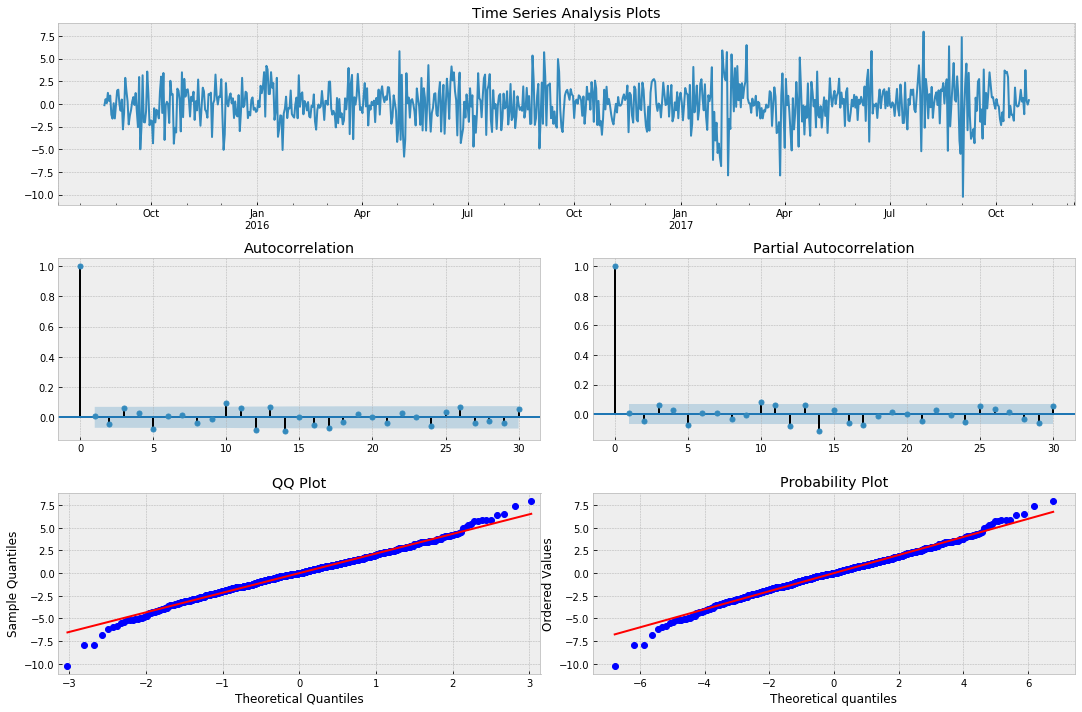

In [251]:
tmp = pd.DataFrame(data=fitted_mdl_t6_1.resid.values, columns=['Value'], index=fitted_mdl_t6_1.resid.index)
test_model(tmp)

    KPSS Stationarity Test Results   
Test Statistic                  0.324
P-value                         0.116
Lags                               21
-------------------------------------

Trend: Constant
Critical Values: 0.74 (1%), 0.46 (5%), 0.35 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.

-----------------------------------------------------

   Augmented Dickey-Fuller Results   
Test Statistic                 -9.889
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


     Phillips-Perron Test (Z-tau)    
Test Statistic                -23.886
P-value                         0.000
Lags                               21
-------------------------------------

Trend: Constant


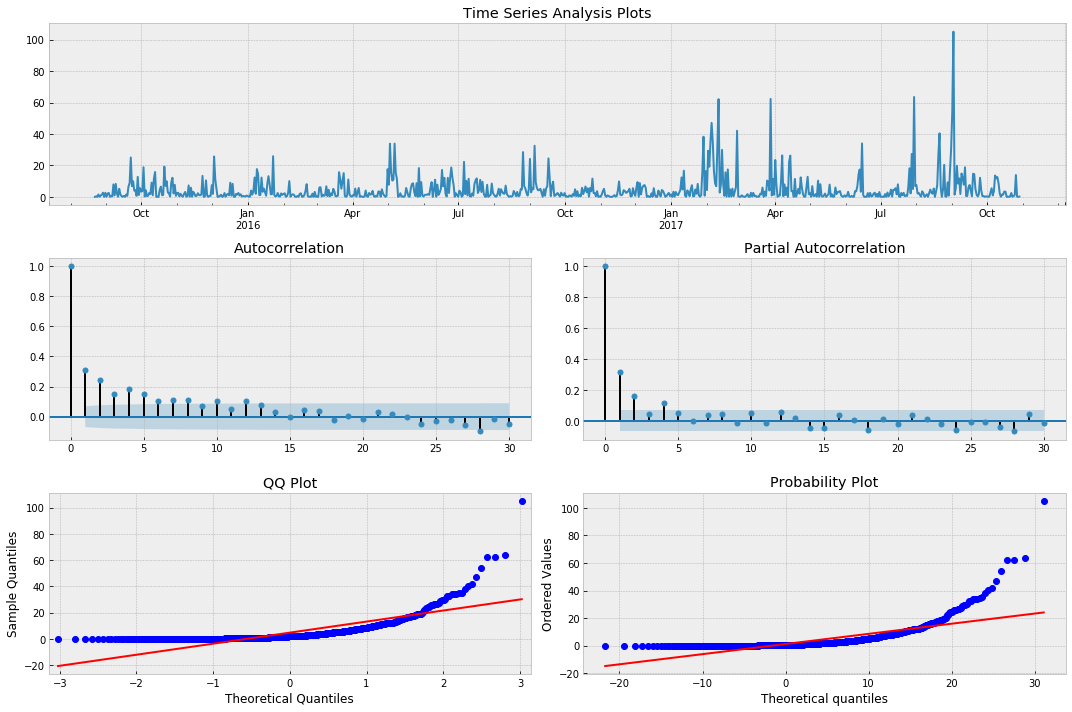

In [252]:
tmp2 = pd.DataFrame(data=fitted_mdl_t6_1.resid.values**2, columns=['Value'], index=fitted_mdl_t6_1.resid.index)
test_model(tmp2)

### Obs.: no exogenous variables were used